In [ ]:
pip install basemap

In [ ]:
pip install -U scikit-learn imbalanced-learn

In [ ]:
pip install --upgrade scikit-learn imbalanced-learn

In [ ]:
pip install xgboost

In [ ]:
pip install lightgbm

# WATER PUMP FUNCTIONALITY PREDICTION 

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from mpl_toolkits.basemap import Basemap
from sklearn.feature_selection import RFE
from mpl_toolkits.basemap import Basemap
from scipy.stats import boxcox , yeojohnson
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.neural_network import MLPClassifier

## Loading the Dataset

#### Train values contains the features.
#### Train labels contains the features labels.

In [2]:
# Loading and reading dataset
train_values = pd.read_csv("C:/Users/psxtm7/Downloads/trainvalue.csv")
train_labels = pd.read_csv("C:/Users/psxtm7/Downloads/trainlabel.csv")
test_values = pd.read_csv("C:/Users/psxtm7/Downloads/test.csv")  

In [3]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [4]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB


### Merging of both train and test dataset for Data preprocessing and Cleaning

In [5]:
# Adding binary variables for train set and test values
train_values["train"] = True
test_values["test"] = True

# Merging train values and train labels
df = pd.merge(left=train_values, right=train_labels, on='id', how='left')

# Merging train values and test values
df = pd.concat([df, test_values], ignore_index = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

In [7]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,train,status_group,test
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,True,functional,NaN
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,functional,NaN
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,True,functional,NaN
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,True,non functional,NaN
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,functional,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

In [9]:
df.describe(include='all')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,train,status_group,test
count,74250.000000,74250.000000,74250,69746,74250.000000,69718,74250.000000,7.425000e+04,74250,74250.000000,...,74250,74250,74250,74250,74250,74250,74250,59400,59400,14850
unique,NaN,NaN,369,2140,NaN,2410,NaN,NaN,45684,NaN,...,5,5,10,7,3,7,6,1,3,1
top,NaN,NaN,2011-03-17,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,True,functional,True
freq,NaN,NaN,695,11299,NaN,21751,NaN,NaN,4440,NaN,...,41522,41522,21216,21216,57286,35628,43239,59400,32259,14850
mean,37124.500000,318.685704,NaN,NaN,665.667313,NaN,34.074262,-5.701771e+00,NaN,0.462330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21434.273081,2906.762364,NaN,NaN,692.761033,NaN,6.572519,2.944969e+00,NaN,11.537879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18562.250000,0.000000,NaN,NaN,0.000000,NaN,33.086819,-8.525675e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37124.500000,0.000000,NaN,NaN,364.000000,NaN,34.907475,-5.026540e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55686.750000,20.000000,NaN,NaN,1317.000000,NaN,37.181685,-3.325058e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Pre-Processing

In [10]:
# checking for number of null values in the dataset
df.isnull().sum().sort_values(ascending=False)

test                     59400
scheme_name              35258
status_group             14850
train                    14850
scheme_management         4846
installer                 4532
funder                    4504
public_meeting            4155
permit                    3793
subvillage                 470
water_quality                0
management                   0
management_group             0
payment                      0
payment_type                 0
quantity_group               0
quality_group                0
quantity                     0
extraction_type_group        0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
extraction_type_class        0
date_recorded                0
extraction_type              0
region                       0
gps_height                   0
longitude                    0
latitude                     0
wpt_name                     0
num_priv

#### Defining function to check for missing, zero and unique values in the dataset.

In [16]:


def analyze_dataset(df):

  # Creating a dictionary to store results
  results = {}
  for col in df.columns:
    # Counting NaN values
    nan_count = df[col].isnull().sum()

    # Counting zero values 
    if pd.api.types.is_numeric_dtype(df[col]):
      zero_count = df[col].eq(0).sum()
    else:
      zero_count = None

    # Counting unique values
    unique_count = df[col].nunique()

    # Storing results in the dictionary
    results[col] = {
        'nan_count': nan_count,
        'zero_count': zero_count,
        'unique_values': unique_count
    }

  # Printing results in a table format
  print("Column Name          |   NaN      |   Zero     | Unique Values")
  print("---------------------|------------|------------|---------------")
  for col, stats in results.items():
    nan_count = f"{stats['nan_count']:,}"  
    zero_count = f"{stats['zero_count']:,}" if stats['zero_count'] is not None else "NA"
    print(f"{col[:20]:<20} | {nan_count:>10} | {zero_count:>10} | {stats['unique_values']:>15}")


analyze_dataset(df)

Column Name          |   NaN      |   Zero     | Unique Values
---------------------|------------|------------|---------------
id                   |          0 |          1 |           74250
amount_tsh           |          0 |     52,049 |             102
date_recorded        |          0 |         NA |             369
funder               |      4,504 |         NA |            2140
gps_height           |          0 |     25,649 |            2456
installer            |      4,532 |         NA |            2410
longitude            |          0 |      2,269 |           71870
latitude             |          0 |          0 |           71869
wpt_name             |          0 |         NA |           45684
num_private          |          0 |     73,299 |              68
basin                |          0 |         NA |               9
subvillage           |        470 |         NA |           21425
region               |          0 |         NA |              21
region_code          |      

#### Dropping :                                                                       
- Id contains high unique values which may be not usefull in prediction model
- num_private contains highest number of zero values
- recorded_by has only i unique value which is also not useful
- scheme_name contains high number of missing values
- wpt_name has high percentage of unique values and may not be useful for prediction.
- region can be dropped , since the dataset already have region_code in numerical features which avoid redundancy.

In [11]:

df = df.drop(columns=['id','num_private','recorded_by','scheme_name','wpt_name'])

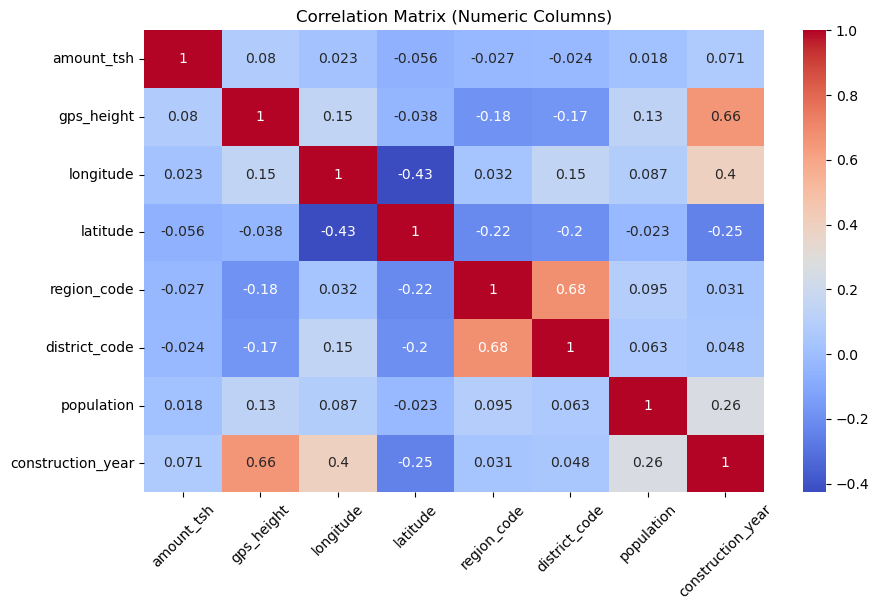

In [18]:
# Plotting Correaltion matrix for all the numerical features in the dataset
# Selecting the numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculating correlation matrix
correlation = numeric_columns.corr()

# Creating heatmap using seaborn
plt.figure(figsize=(10, 6))  

# Annotating the values on the heatmap
heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Adding the labels and title
heatmap.set_title('Correlation Matrix (Numeric Columns)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [12]:
# district_code column will be dropped as it is highly correlated with region_code and also has some zero values
df = df.drop(columns='district_code')

In [13]:
# converting the date_recorded feature into required format
df["date"]=pd.to_datetime(df.date_recorded,format="%Y-%m-%d")
df = df.drop(columns='date_recorded')

#### Comparing similar column names to check for unique values between the features to reduce data redundancy

In [14]:

for column in ['management', 'management_group']:
    print(df[column].unique())

['vwc' 'wug' 'other' 'private operator' 'water board' 'wua' 'company'
 'water authority' 'parastatal' 'unknown' 'other - school' 'trust']
['user-group' 'other' 'commercial' 'parastatal' 'unknown']


In [15]:
for column in ['payment', 'payment_type']:
    print(df[column].unique())

['pay annually' 'never pay' 'pay per bucket' 'unknown'
 'pay when scheme fails' 'other' 'pay monthly']
['annually' 'never pay' 'per bucket' 'unknown' 'on failure' 'other'
 'monthly']


In [16]:
for column in ['water_quality', 'quality_group']:
    print(df[column].unique())

['soft' 'salty' 'milky' 'unknown' 'fluoride' 'coloured' 'salty abandoned'
 'fluoride abandoned']
['good' 'salty' 'milky' 'unknown' 'fluoride' 'colored']


In [17]:
for column in ['quantity', 'quantity_group']:
    print(df[column].unique())

['enough' 'insufficient' 'dry' 'seasonal' 'unknown']
['enough' 'insufficient' 'dry' 'seasonal' 'unknown']


In [18]:
for column in ['extraction_type','extraction_type_group', 'extraction_type_class']:
    print(df[column].unique())

['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'ksb' 'mono' 'windmill' 'afridev' 'other - rope pump' 'india mark iii'
 'other - swn 81' 'other - play pump' 'cemo' 'climax' 'walimi'
 'other - mkulima/shinyanga']
['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'mono' 'wind-powered' 'afridev' 'rope pump' 'india mark iii'
 'other handpump' 'other motorpump']
['gravity' 'submersible' 'handpump' 'other' 'motorpump' 'wind-powered'
 'rope pump']


In [19]:
for column in ['source','source_type', 'source_class']:
    print(df[column].unique())

['spring' 'rainwater harvesting' 'dam' 'machine dbh' 'other'
 'shallow well' 'river' 'hand dtw' 'lake' 'unknown']
['spring' 'rainwater harvesting' 'dam' 'borehole' 'other' 'shallow well'
 'river/lake']
['groundwater' 'surface' 'unknown']


In [20]:
for column in ['waterpoint_type', 'waterpoint_type_group']:
    print(df[column].unique())

['communal standpipe' 'communal standpipe multiple' 'hand pump' 'other'
 'improved spring' 'cattle trough' 'dam']
['communal standpipe' 'hand pump' 'other' 'improved spring'
 'cattle trough' 'dam']


##### After comparing unique values the columns with same unique values like payment, quantity, extraction_type_group, extraction_type_class,waterpoint_type_group, source_type and source_class can be removed.
##### Although the location information,columns like subvillage,lga and ward may not be as relevant as more general geographic features like basin, region, and district_code.

In [21]:

df = df.drop(columns=['payment','quantity','extraction_type_group', 'extraction_type_class','waterpoint_type_group',
                      'source_type','source_class','subvillage','lga','ward'])

In [29]:
# Checking for all the counts of unique values in dataset

for col in df.select_dtypes(include='object'):
    print(f"Column: {col}")
    value_counts = df[col].value_counts().sort_values(ascending=False)
    print(value_counts)
    print()

Column: funder
Government Of Tanzania    11299
Danida                     3907
Hesawa                     2782
Rwssp                      1703
World Bank                 1701
                          ...  
Shabani Mharami               1
Magufudi                      1
Old Bank                      1
W0rld  Bank                   1
Velem                         1
Name: funder, Length: 2140, dtype: int64

Column: installer
DWE                       21751
Government                 2282
RWE                        1498
Commu                      1347
DANIDA                     1305
                          ...  
Africa M                      1
Rombo delta                   1
MIAB                          1
GETDSC00                      1
Central government/TLC        1
Name: installer, Length: 2410, dtype: int64

Column: basin
Lake Victoria              12871
Pangani                    11143
Rufiji                      9987
Internal                    9642
Lake Tanganyika             80

#### Filling the missing values as unknown which can avoid bias that might occur due to imputation or deletion.

In [22]:


df[["scheme_management", "public_meeting", "permit", "funder","installer"]] = df[["scheme_management", "public_meeting", "permit", "funder","installer"]].fillna("unknown", inplace=False)


In [31]:
# Checking the dataset missing value after preprocessing
analyze_dataset(df)

Column Name          |   NaN      |   Zero     | Unique Values
---------------------|------------|------------|---------------
amount_tsh           |          0 |     52,049 |             102
funder               |          0 |         NA |            2141
gps_height           |          0 |     25,649 |            2456
installer            |          0 |         NA |            2410
longitude            |          0 |      2,269 |           71870
latitude             |          0 |          0 |           71869
basin                |          0 |         NA |               9
region               |          0 |         NA |              21
region_code          |          0 |          0 |              27
population           |          0 |     26,834 |            1128
public_meeting       |          0 |         NA |               3
scheme_management    |          0 |         NA |              13
permit               |          0 |         NA |               3
construction_year    |      

#### Ploting map of pump functionality condition using the geograhical information in the dataset.

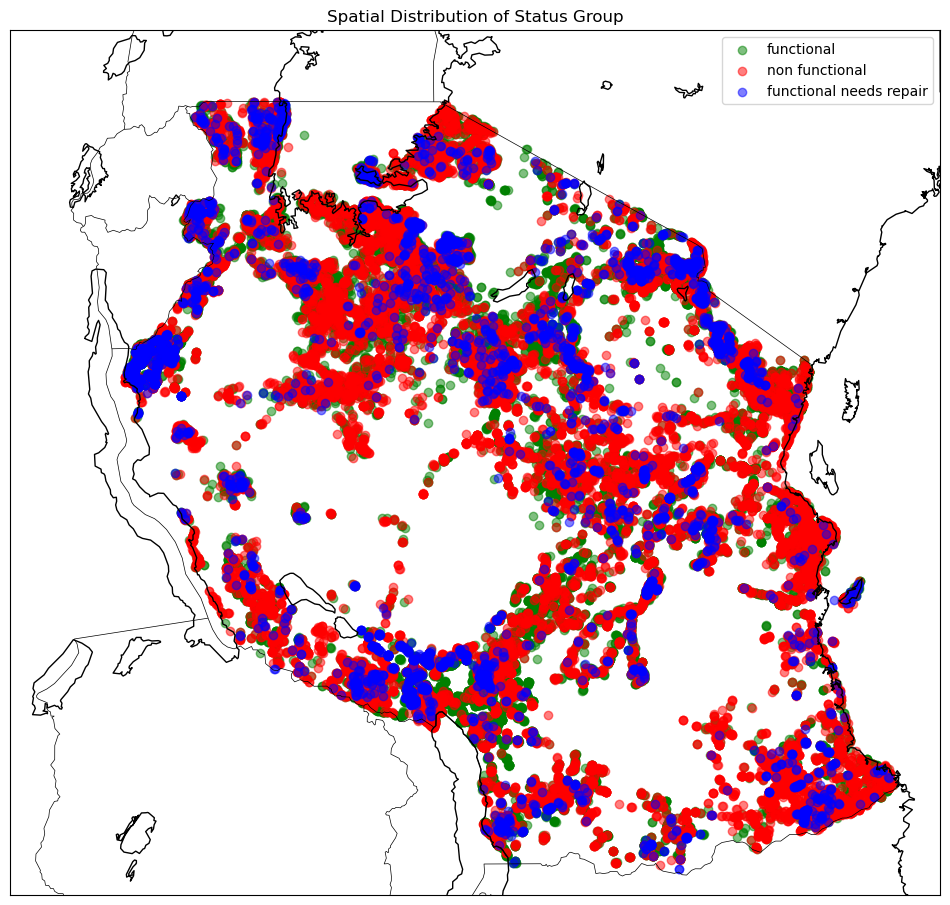

In [32]:


# Filtering data with missing status_group
filtered_data = df.dropna(subset=['status_group'])

# Creating a scatter plot on a map
plt.figure(figsize=(12, 12))
m = Basemap(projection='merc', llcrnrlat=-12, urcrnrlat=0, llcrnrlon=28, urcrnrlon=41, resolution='i')
m.drawcoastlines()
m.drawcountries()

# Getting coordinates and status_group
lons = filtered_data['longitude'].values
lats = filtered_data['latitude'].values
status_group = filtered_data['status_group'].values

# Scatter plot with status_group as color
colors = {'functional': 'green', 'non functional': 'red', 'functional needs repair': 'blue' , 'nan':'maroon'}
for status in ['functional', 'non functional', 'functional needs repair']:
    mask = (status_group == status)
    x, y = m(lons[mask], lats[mask])
    m.scatter(x, y, color=colors[status], alpha=0.5, label=status)

plt.legend()

# Showing plot
plt.title('Spatial Distribution of Status Group')
plt.show()


#### Analysing the Skewness and kurtosis of the features.

Skewness:
amount_tsh           56.370021
population           11.780615
construction_year    -0.629784
gps_height            0.469294
longitude            -4.187363
latitude             -0.152881
dtype: float64

Kurtosis:
amount_tsh           4766.565058
population            343.365563
construction_year      -1.602932
gps_height             -1.286042
longitude              19.148748
latitude               -1.054208
dtype: float64


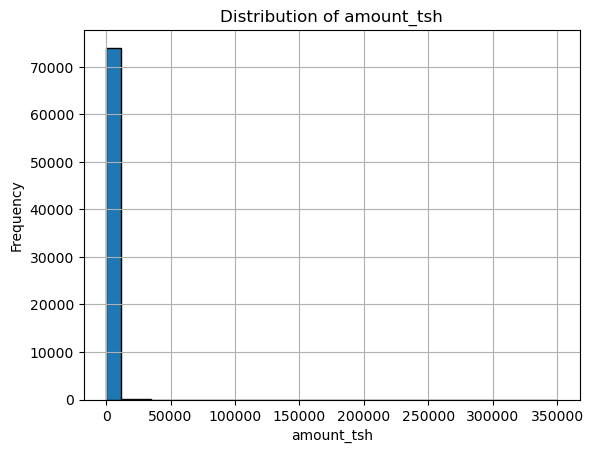

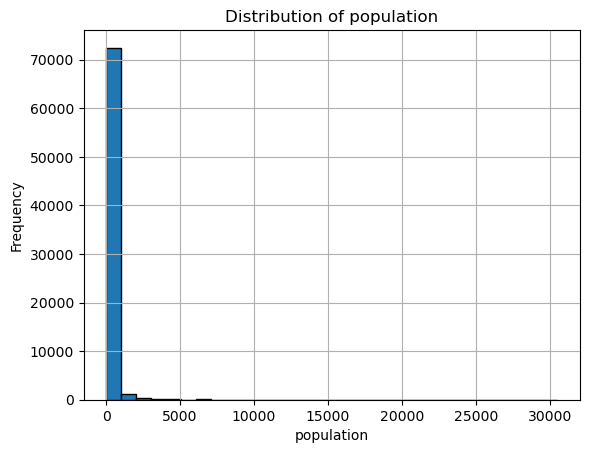

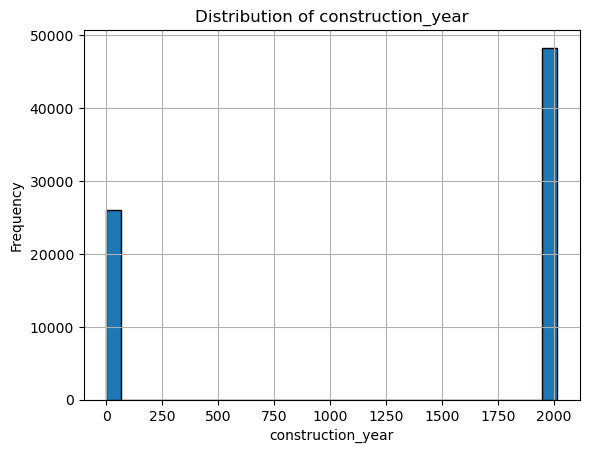

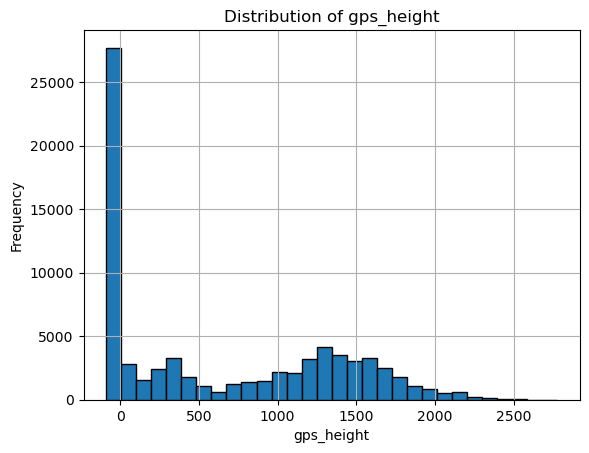

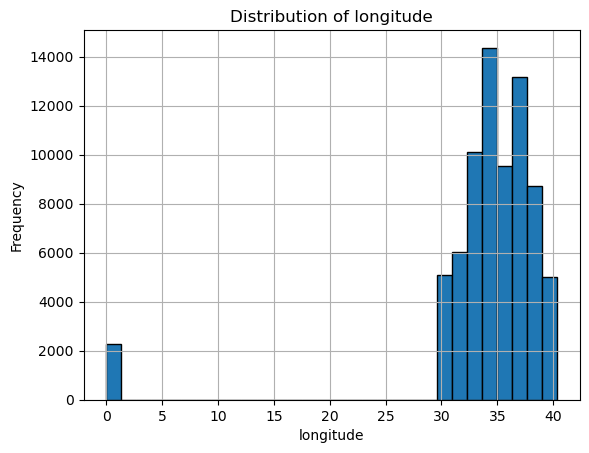

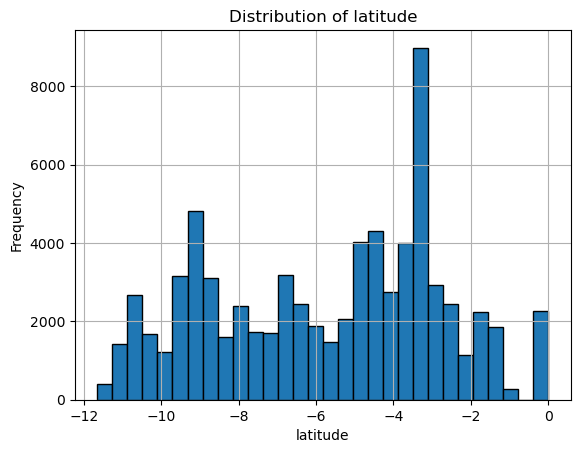

In [33]:


selected_features = ['amount_tsh', 'population', 'construction_year','gps_height','longitude','latitude'] 

# Checking skewness and kurtosis
print("Skewness:")
print(df[selected_features].skew())
print("\nKurtosis:")
print(df[selected_features].kurt())

# Plotting distributions
for feature in selected_features:
  df[feature].hist(bins=30, edgecolor='black')
  plt.title(f"Distribution of {feature}")
  plt.xlabel(feature)
  plt.ylabel("Frequency")
  plt.grid(True)
  plt.show()


#### Amount_tsh and population columns exhibit high skewness and kurtosis values, indicating the presence of outliers and non-normal distributions.Identifying and handle outliers in the amount_tsh and population columns, which have extremely high kurtosis values.Using techniques like winsorization or capping to mitigate the influence of outliers.

In [23]:
cols_to_winsorize = ['amount_tsh', 'population']
for col in cols_to_winsorize:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.clip(df[col], lower_bound, upper_bound)

#### Creating a separate category for zero values in amount_tsh as we don't know if the zero in that features is of not recorded or zero has some meaning to the dataset.

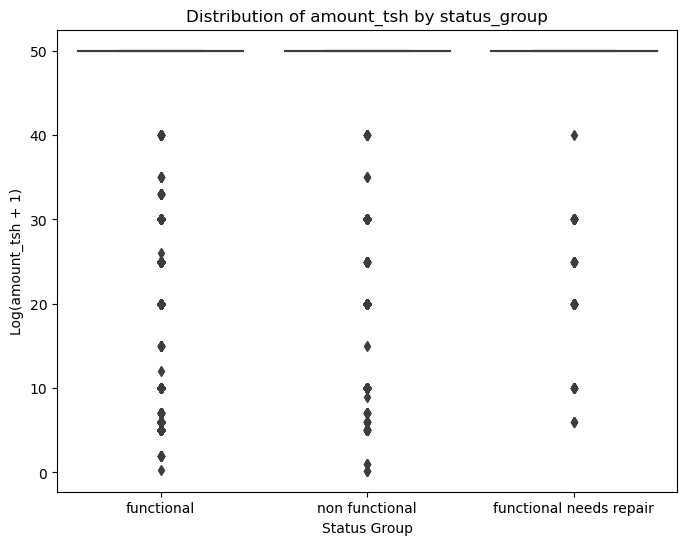

In [24]:
df['amount_tsh_zero'] = (df['amount_tsh'] == 0).astype(int)
df['amount_tsh'] = df['amount_tsh'].replace(0, np.nan)
df['amount_tsh'] = df['amount_tsh'].fillna(df['amount_tsh'].median())

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='status_group', y='amount_tsh', data=df)
plt.title('Distribution of amount_tsh by status_group')
plt.xlabel('Status Group')
plt.ylabel('Log(amount_tsh + 1)')
plt.show()


#### Filling zero values using median.

In [25]:
# Zero value imputation for columns using median values
df['gps_height'] = df['gps_height'].replace(0, df['gps_height'].median())
df['longitude'] = df['longitude'].replace(0, df['longitude'].median())
df['population'] = df['population'].replace(0, df['population'].median())

##### Reducing the skewness of the longitude, population and amount_tsh features using boxcox and Logarithmic transformation.

In [26]:
# Shifting the data to be strictly positive
df['longitude'] = df['longitude'] - df['longitude'].min() + 1
# Applying Box-Cox transformation
df['longitude'], lam= boxcox(df['longitude'])

# Printing the updated skewness values
print("Skewness after transformations:")
print(df['longitude'].skew())

Skewness after transformations:
-0.14570909477584904


In [27]:
# Applying logarithmic transformation to highly skewed features
df['population'] = np.log1p(df['population'])
df['amount_tsh'] = np.log1p(df['amount_tsh'])

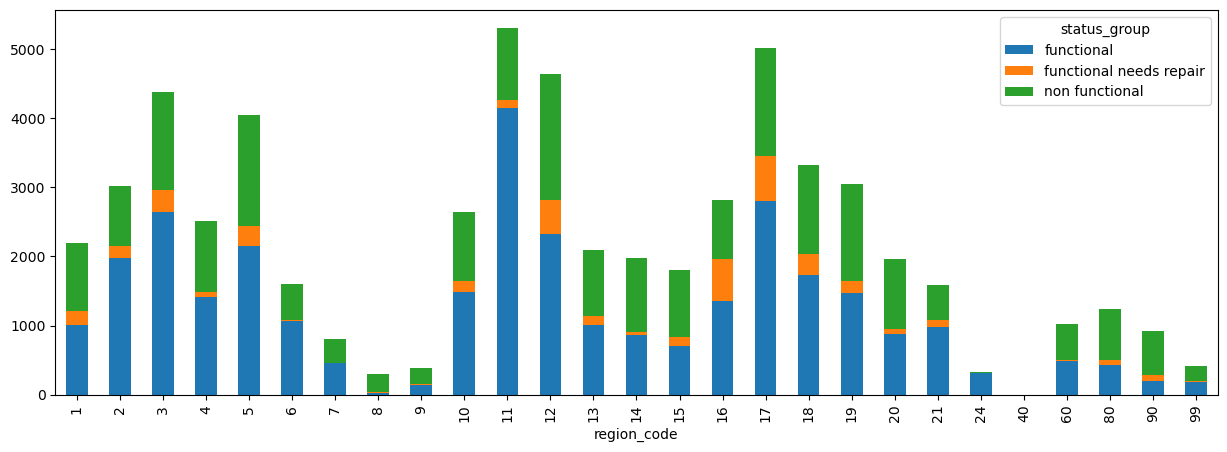

In [39]:
pd.crosstab(df.region_code, df.status_group).plot.bar(stacked=True, figsize=(15,5));

### Feature Engineering

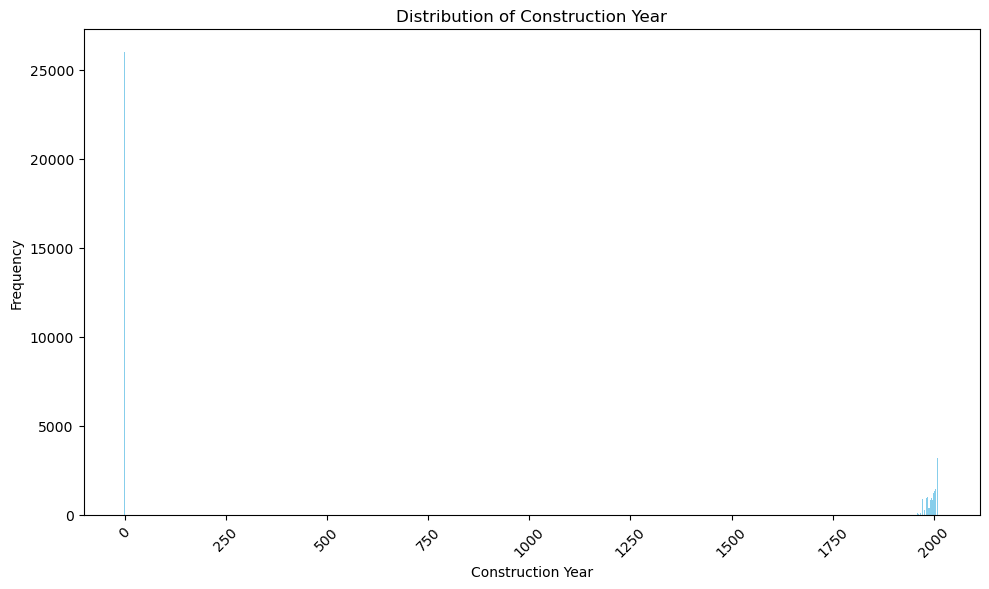

In [42]:

construction_year_counts = df['construction_year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(construction_year_counts.index, construction_year_counts.values, color='skyblue')
plt.xlabel('Construction Year')
plt.ylabel('Frequency')
plt.title('Distribution of Construction Year')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

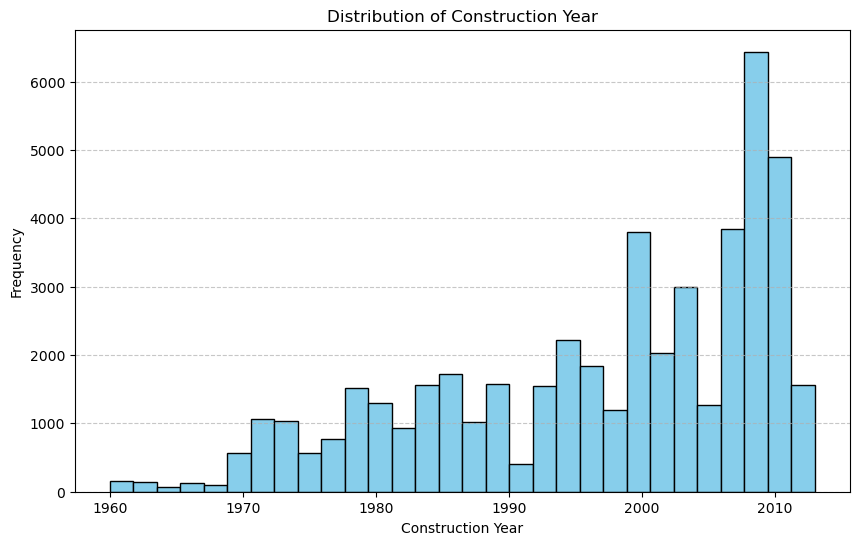

In [43]:
construction_year = df['construction_year']

# Removing zeros 
construction_year = construction_year[construction_year != 0]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(construction_year, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Creating new feature using the contruction year column into construction decade

In [28]:
# Defining a function to convert years into decades
def convert_to_decade(year):
    if year == 0:
        return 'Unknown'
    elif 1960 <= year < 1970:
        return "60s"
    elif 1970 <= year < 1980:
        return "70s"
    elif 1980 <= year < 1990:
        return "80s"
    elif 1990 <= year < 2000:
        return "90s"
    elif 2000 <= year < 2010:
        return "2000s"
    else:
        return "2010s"

# Applying the function to the 'construction_year' column and create a new column 'contruction_decade'
df['contruction_decade'] = df['construction_year'].apply(convert_to_decade)

# Dropping the original 'construction_year' column
df.drop(columns=['construction_year'], inplace=True)

In [45]:
df.date.describe()

C:\Users\local_psxtm7\Temp\ipykernel_23828\1371252037.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.date.describe()


count                   74250
unique                    369
top       2011-03-17 00:00:00
freq                      695
first     2001-03-26 00:00:00
last      2013-12-03 00:00:00
Name: date, dtype: object

#### Creating new feature using data column into days since the last recorded date

In [29]:
# Calculating the number of days since the last recorded date
last_date = df['date'].max()
df['days_since_recorded'] = (last_date - df['date']).dt.days
df.drop(columns=['date'], inplace=True)

In [47]:
df.days_since_recorded.describe()

count    74250.000000
mean       614.589010
std        335.101799
min          0.000000
25%        297.000000
50%        419.000000
75%        977.000000
max       4635.000000
Name: days_since_recorded, dtype: float64

### Dataset is now cleaned 

In [48]:
analyze_dataset(df)

Column Name          |   NaN      |   Zero     | Unique Values
---------------------|------------|------------|---------------
amount_tsh           |          0 |          0 |              21
funder               |          0 |         NA |            2141
gps_height           |          0 |          0 |            2455
installer            |          0 |         NA |            2410
longitude            |          0 |          1 |           71870
latitude             |          0 |          0 |           71869
basin                |          0 |         NA |               9
region               |          0 |         NA |              21
region_code          |          0 |          0 |              27
population           |          0 |          0 |             514
public_meeting       |          0 |         NA |               3
scheme_management    |          0 |         NA |              13
permit               |          0 |         NA |               3
extraction_type      |      

#### Capping the funder and installer unique values to top 20 to reduce complexity and increase model generalization and interpretability

In [30]:


cols = ['funder', 'installer']

# Looping through each column
for col in cols:
    # Getting the unique values and their counts
    unique_values = df[col].value_counts()

    # Selecting the top 20 unique values
    top_values = unique_values.head(20).index.tolist()

    # Assigning 'other' to remaining unique values
    other_values = unique_values.index.difference(top_values)

    # Updating the DataFrame with 'other' for remaining unique values
    df[col] = df[col].apply(lambda x: 'other' if x in other_values else x)


In [50]:
df['installer'].unique()

array(['other', 'World vision', 'DWE', 'DANIDA', 'WEDECO', 'unknown',
       'Central government', 'Commu', 'LGA', 'Government', 'KKKT', 'RWE',
       'HESAWA', 'Community', 'CES', 'Hesawa', 'TASAF', '0', 'DANID',
       'TCRS', 'District Council'], dtype=object)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   amount_tsh           74250 non-null  float64
 1   funder               74250 non-null  object 
 2   gps_height           74250 non-null  int64  
 3   installer            74250 non-null  object 
 4   longitude            74250 non-null  float64
 5   latitude             74250 non-null  float64
 6   basin                74250 non-null  object 
 7   region               74250 non-null  object 
 8   region_code          74250 non-null  int64  
 9   population           74250 non-null  float64
 10  public_meeting       74250 non-null  object 
 11  scheme_management    74250 non-null  object 
 12  permit               74250 non-null  object 
 13  extraction_type      74250 non-null  object 
 14  management           74250 non-null  object 
 15  management_group     74250 non-null 

#### Visualization plots to understand relation between the coulumns and the status group for better understanding the data  and to analyse which encoder to use for the categorical values.

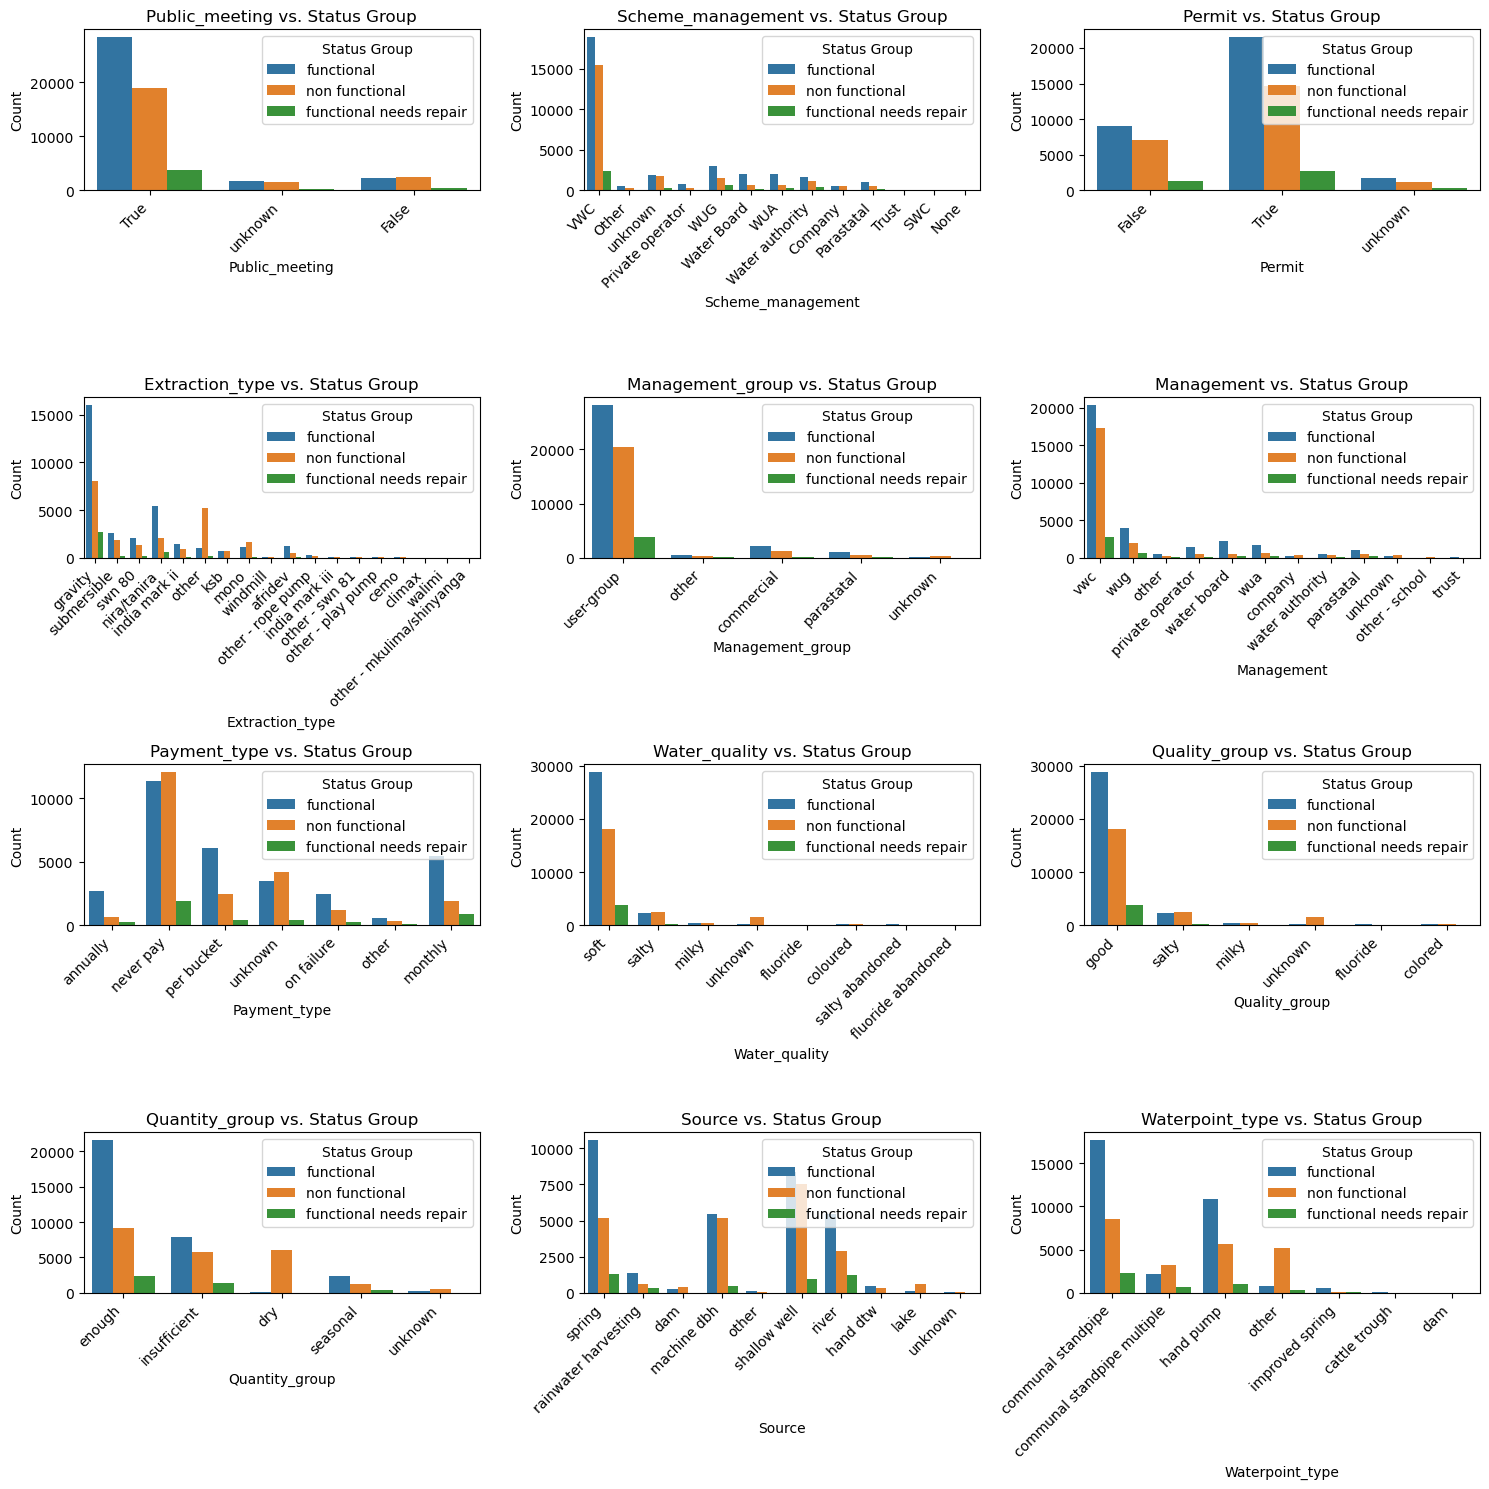

In [43]:
# Selecting columns for visualization
columns_to_visualize = ['public_meeting', 'scheme_management', 'permit','extraction_type', 'management_group', 'management', 'payment_type',
                         'water_quality', 'quality_group', 'quantity_group', 'source', 'waterpoint_type']

# Setting up subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Flattening axes for easier iteration
axes = axes.flatten()

# Looping through each column and creating count plots
for i, column in enumerate(columns_to_visualize):
    sns.countplot(x=column, hue='status_group', data=df, ax=axes[i])
    axes[i].set_title(f'{column.capitalize()} vs. Status Group')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Status Group')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [44]:
top_10_extraction_types = df['extraction_type'].value_counts().head(20)
print(top_10_extraction_types)


gravity                      33263
nira/tanira                  10205
other                         8102
submersible                   5982
swn 80                        4588
mono                          3628
india mark ii                 3029
afridev                       2208
ksb                           1790
other - rope pump              572
other - swn 81                 284
windmill                       152
india mark iii                 135
cemo                           108
other - play pump              101
walimi                          60
climax                          41
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64


#### Splitting the train and test 

In [70]:
# Splitting the DataFrame into train and test DataFrames
train_df1 = df[df['train'] == True].drop(columns=['test'])
test_df1 = df[df['test'] == True].drop(columns=['train','status_group'])

# Droping the 'train' and 'test' columns from train_df and test_df
train_df1.drop(columns=['train'], inplace=True)
test_df1.drop(columns=['test'], inplace=True)

In [71]:
# Defining a dictionary to map functionality labels to numerical values
status_mapping = {'functional': 1, 'non functional': 0, 'functional needs repair': 2}
train_df1['status_group'] = train_df1['status_group'].replace(status_mapping)

In [72]:
# Converting the categorical feature values into categorical code for training model

categorical_columns = ['funder', 'installer', 'basin', 'region', 'public_meeting',
                       'scheme_management', 'permit', 'extraction_type', 'management',
                       'management_group', 'payment_type', 'water_quality', 'quality_group',
                       'quantity_group', 'source', 'waterpoint_type', 'contruction_decade']

# Converting categorical columns to category type
for col in categorical_columns:
    train_df1[col] = train_df1[col].astype('category')

In [73]:
# Encoding categorical columns using cat.codes
traindf_encoded = train_df1.copy()
for col in categorical_columns:
    traindf_encoded[col] = train_df1[col].cat.codes

#### Correlation matrix.

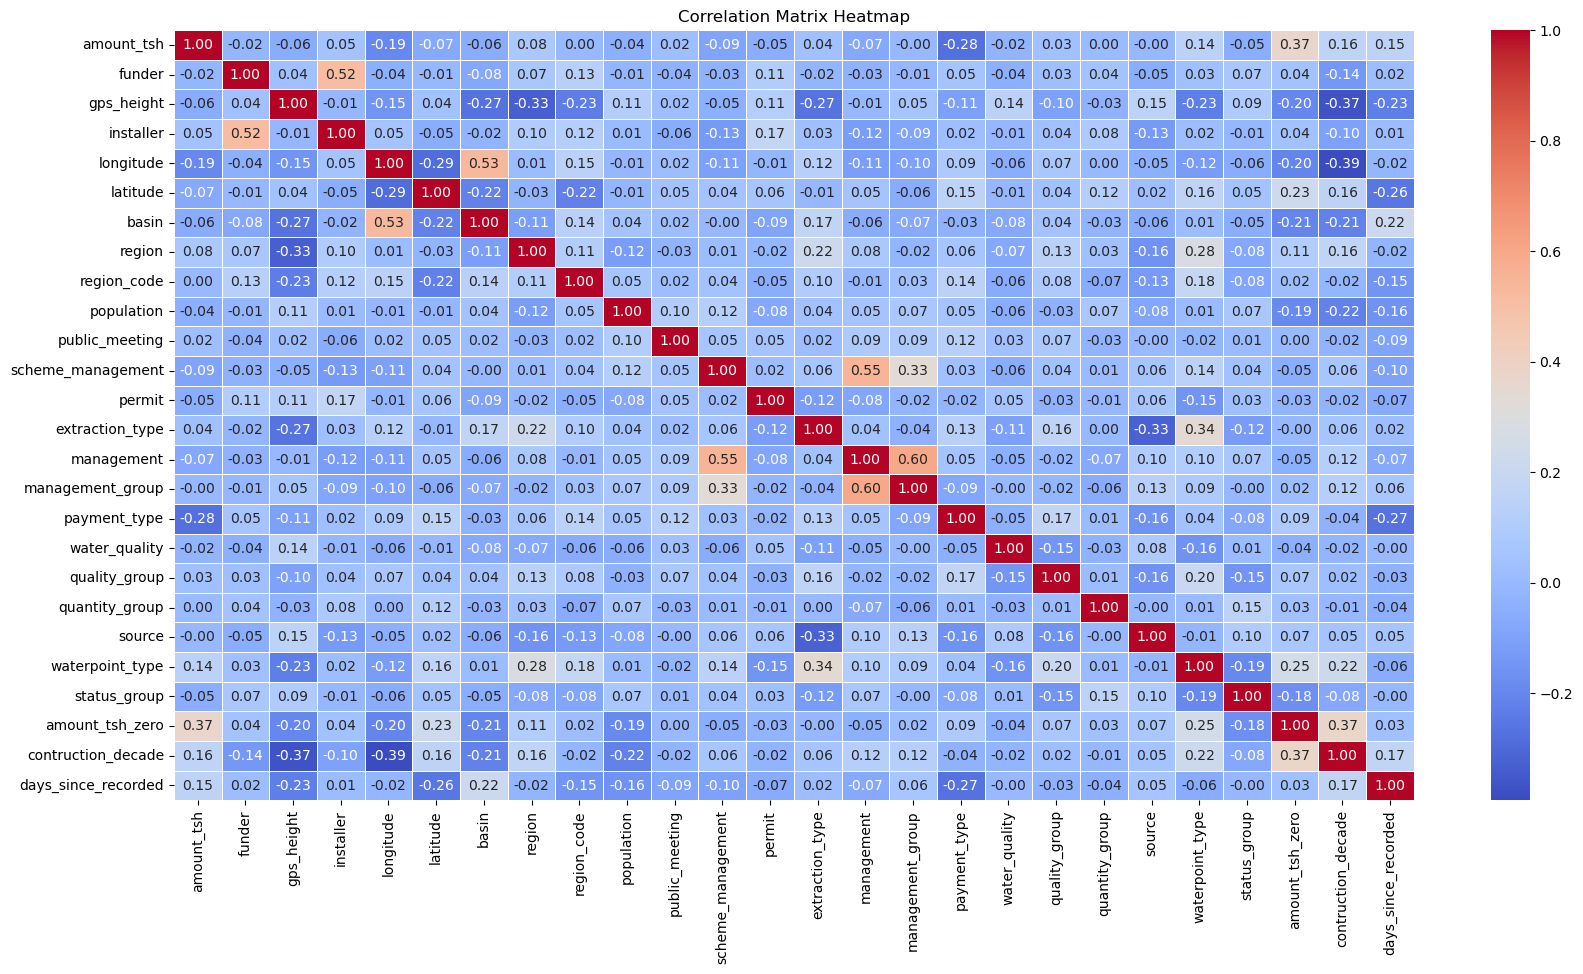

In [49]:
# Computing the correlation matrix
corr_matrix = traindf_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Feature Selection using ensemble method(random forest).

In [74]:
# Feature selection method using random forest and ranking the features with their importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

X= traindf_encoded.drop(columns=['status_group'])
y = traindf_encoded['status_group']

# Creating a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Creating the Recursive Feature Elimination object with cross-validation
rfecv = RFECV(estimator=clf, cv=5, scoring='accuracy')

# Fitting the model with feature selection
rfecv.fit(X, y)

# Getting the ranking of features (boolean array)
feature_ranking = rfecv.support_

# Getting feature names
feature_names = X.columns.tolist() 

# Creating a list to store ranked features with names
ranked_features = []
for i, ranked in enumerate(feature_ranking):
    if ranked:  
        ranked_features.append((feature_names[i], i + 1))

# Sorting ranked features by importance (descending order)
ranked_features.sort(key=lambda x: x[1], reverse=True)  # Sort by rank (descending)

# Printing the ranking in order of most important to least important
print("Feature ranking (most important to least important):")
for feature, rank in ranked_features:
    print(f"\tFeature Name: {feature} - Rank: {rank}")


Feature ranking (most important to least important):
	Feature Name: days_since_recorded - Rank: 25
	Feature Name: contruction_decade - Rank: 24
	Feature Name: amount_tsh_zero - Rank: 23
	Feature Name: waterpoint_type - Rank: 22
	Feature Name: source - Rank: 21
	Feature Name: quantity_group - Rank: 20
	Feature Name: quality_group - Rank: 19
	Feature Name: water_quality - Rank: 18
	Feature Name: payment_type - Rank: 17
	Feature Name: management - Rank: 15
	Feature Name: extraction_type - Rank: 14
	Feature Name: scheme_management - Rank: 12
	Feature Name: population - Rank: 10
	Feature Name: region_code - Rank: 9
	Feature Name: region - Rank: 8
	Feature Name: basin - Rank: 7
	Feature Name: latitude - Rank: 6
	Feature Name: longitude - Rank: 5
	Feature Name: installer - Rank: 4
	Feature Name: gps_height - Rank: 3
	Feature Name: funder - Rank: 2


In [ ]:
# Splitting train_df from training model
X = traindf_encoded[['funder', 'gps_height', 'installer', 'longitude', 'latitude',
       'basin', 'region', 'region_code', 'population',
       'scheme_management', 'extraction_type', 'management', 'payment_type',
       'water_quality', 'quality_group','quantity_group']]
y = traindf_encoded['status_group']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression Model

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Defining the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', LogisticRegression(multi_class='multinomial', max_iter=1000))  # Multiclass Logistic Regression
])


# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Computing class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Defining the hyperparameters grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],  # Optimization algorithm
    'classifier__class_weight': [{0: class_weights[0], 1: class_weights[1], 2: class_weights[2]}]
}

# StratifiedKFold with the specified number of folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy',verbose=2)

# Fitting the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Getting the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END classifier__C=0.01, classifier__class_weight={0: 0.8678500986193294, 1: 0.6139058987675374, 2: 4.570109636468552}, classifier__solver=newton-cg; total time=   0.1s
[CV] END classifier__C=0.01, classifier__class_weight={0: 0.8678500986193294, 1: 0.6139058987675374, 2: 4.570109636468552}, classifier__solver=newton-cg; total time=   0.1s
[CV] END classifier__C=0.01, classifier__class_weight={0: 0.8678500986193294, 1: 0.6139058987675374, 2: 4.570109636468552}, classifier__solver=newton-cg; total time=   0.1s
[CV] END classifier__C=0.01, classifier__class_weight={0: 0.8678500986193294, 1: 0.6139058987675374, 2: 4.570109636468552}, classifier__solver=newton-cg; total time=   0.1s
[CV] END classifier__C=0.01, classifier__class_weight={0: 0.8678500986193294, 1: 0.6139058987675374, 2: 4.570109636468552}, classifier__solver=newton-cg; total time=   0.1s
[CV] END classifier__C=0.01, classifier__class_weight={0: 0.86785009861932

In [51]:
# Logistic Regression classifier with the best parameters
best_classifier = LogisticRegression(multi_class='multinomial', max_iter=1000,
                                      C=best_params['classifier__C'],
                                      solver=best_params['classifier__solver'])

# Fit the classifier 
best_classifier.fit(X_train_scaled, y_train)

# prediction
y_predLG = best_classifier.predict(X_test_scaled)

# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_predLG))


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.40      0.48      4572
           1       0.61      0.83      0.70      6457
           2       0.00      0.00      0.00       851

    accuracy                           0.60     11880
   macro avg       0.40      0.41      0.39     11880
weighted avg       0.56      0.60      0.56     11880



C:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### MLP Classifier Model

In [52]:
# MLP classifier model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold



# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,)],
    'activation': ['relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# neural network classifier
nn_classifier = MLPClassifier(max_iter=1000)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#GridSearchCV
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=cv, scoring='accuracy',verbose=2)

# Performing grid search to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Getting the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)



Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=  25.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=  25.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=  23.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=  26.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=  20.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=  52.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time= 1.7min
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver

In [53]:
# MLP classifier with the best parameters
best_nn_classifier = MLPClassifier(max_iter=1000, **best_params)

best_nn_classifier.fit(X_train_scaled, y_train)

y_pred_MLP = best_nn_classifier.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred_MLP))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.61      0.69      4572
           1       0.71      0.89      0.79      6457
           2       0.51      0.12      0.19       851

    accuracy                           0.73     11880
   macro avg       0.67      0.54      0.56     11880
weighted avg       0.72      0.73      0.71     11880



#### KNN Model

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],   # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# KNN classifier
knn_classifier = KNeighborsClassifier()

# GridSearchCV 
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train_scaled, y_train)

# Getting the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Getting the best model
best_knn = grid_search.best_estimator_

# Predicting the labels for the test set
y_predKNN = best_knn.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_predKNN))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.76489898989899
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      4572
           1       0.79      0.85      0.82      6457
           2       0.49      0.35      0.41       851

    accuracy                           0.77     11880
   macro avg       0.69      0.65      0.66     11880
weighted avg       0.77      0.77      0.77     11880



#### Comparing the results of the models.

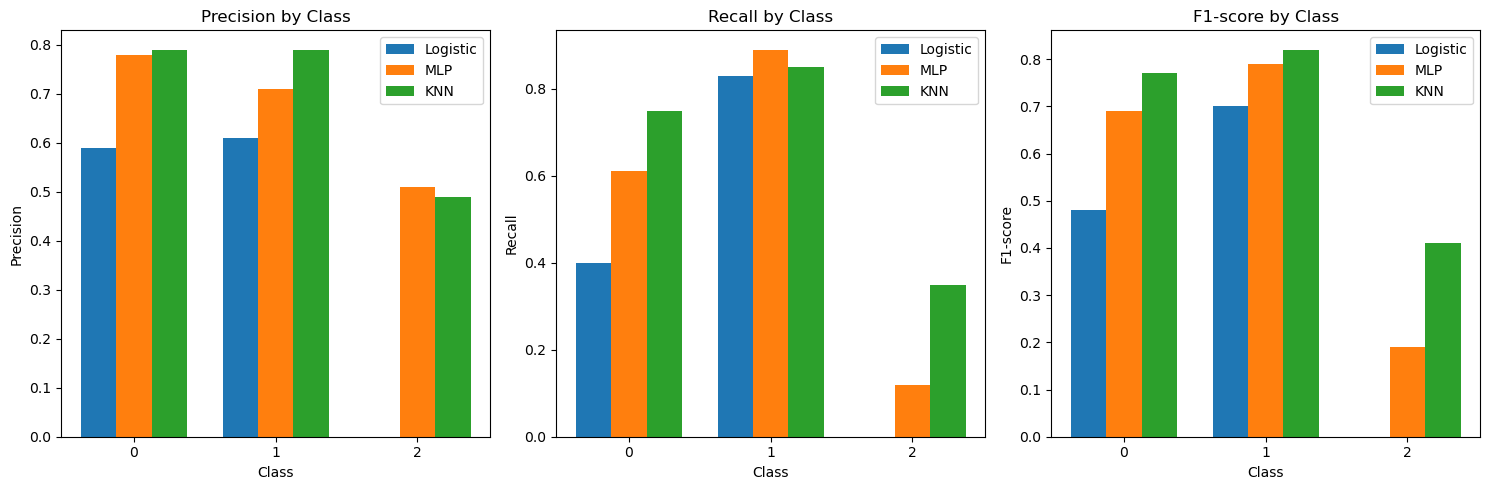

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the metrics and classes
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1', '2'] 

# Defining the classification reports for each model
logistic_report = {
    'precision': [0.59, 0.61, 0.00],
    'recall': [0.40, 0.83, 0.00],
    'f1-score': [0.48, 0.70, 0.00]
}

mlp_report = {
    'precision': [0.78, 0.71, 0.51],
    'recall': [0.61, 0.89, 0.12],
    'f1-score': [0.69, 0.79, 0.19]
}

knn_report = {
    'precision': [0.79, 0.79, 0.49],
    'recall': [0.75, 0.85, 0.35],
    'f1-score': [0.77, 0.82, 0.41]
}

# Creating subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plotting each metric
for i, metric in enumerate(metrics):
    # Get scores for each model
    logistic_scores = logistic_report[metric]
    mlp_scores = mlp_report[metric]
    knn_scores = knn_report[metric]

    # Set bar width
    bar_width = 0.25
    index = np.arange(len(classes))

    # Plot bars for each class
    axes[i].bar(index - bar_width, logistic_scores, bar_width, label='Logistic')
    axes[i].bar(index, mlp_scores, bar_width, label='MLP')
    axes[i].bar(index + bar_width, knn_scores, bar_width, label='KNN')

    # Set labels and title
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_title(f'{metric.capitalize()} by Class')
    axes[i].set_xticks(index)
    axes[i].set_xticklabels(classes)
    axes[i].legend()

plt.tight_layout()
plt.show()


#### Encoding separately for Tree based models using LabelEncoder and OrdinalEncoder.

In [31]:
# Label encoding for columns with unique values
label_encoder = LabelEncoder()

# Converting boolean columns to string
bool_cols = ['public_meeting', 'permit']
for col in bool_cols:
    df[col] = df[col].astype(str)

for col in ['basin', 'funder','installer','region','public_meeting', 'permit']:
    df[col] = label_encoder.fit_transform(df[col])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   amount_tsh           74250 non-null  float64
 1   funder               74250 non-null  int32  
 2   gps_height           74250 non-null  int64  
 3   installer            74250 non-null  int32  
 4   longitude            74250 non-null  float64
 5   latitude             74250 non-null  float64
 6   basin                74250 non-null  int32  
 7   region               74250 non-null  int32  
 8   region_code          74250 non-null  int64  
 9   population           74250 non-null  float64
 10  public_meeting       74250 non-null  int32  
 11  scheme_management    74250 non-null  object 
 12  permit               74250 non-null  int32  
 13  extraction_type      74250 non-null  object 
 14  management           74250 non-null  object 
 15  management_group     74250 non-null 

In [32]:
# List of columns to be ordinal encoded
columns_to_encode = ['extraction_type', 'management_group', 'management', 'payment_type',
                     'water_quality', 'quality_group', 'quantity_group', 'source',
                     'waterpoint_type', 'contruction_decade','scheme_management']

# OrdinalEncoder
encoder = OrdinalEncoder()

# Fitting and transforming the columns in the train DataFrame
df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

In [33]:
# Defining a dictionary to map string labels to numerical values
status_mapping = {'functional': 1, 'non functional': 0, 'functional needs repair': 2}
df['status_group'] = df['status_group'].replace(status_mapping)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   amount_tsh           74250 non-null  float64
 1   funder               74250 non-null  int32  
 2   gps_height           74250 non-null  int64  
 3   installer            74250 non-null  int32  
 4   longitude            74250 non-null  float64
 5   latitude             74250 non-null  float64
 6   basin                74250 non-null  int32  
 7   region               74250 non-null  int32  
 8   region_code          74250 non-null  int64  
 9   population           74250 non-null  float64
 10  public_meeting       74250 non-null  int32  
 11  scheme_management    74250 non-null  float64
 12  permit               74250 non-null  int32  
 13  extraction_type      74250 non-null  float64
 14  management           74250 non-null  float64
 15  management_group     74250 non-null 

In [34]:
# Splitting the DataFrame into train and test DataFrames
train_df = df[df['train'] == True].drop(columns=['test'])
test_df = df[df['test'] == True].drop(columns=['train','status_group'])

# Dropping the 'train' and 'test' columns from train_df and test_df
train_df.drop(columns=['train'], inplace=True)
test_df.drop(columns=['test'], inplace=True)


In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   amount_tsh           59400 non-null  float64
 1   funder               59400 non-null  int32  
 2   gps_height           59400 non-null  int64  
 3   installer            59400 non-null  int32  
 4   longitude            59400 non-null  float64
 5   latitude             59400 non-null  float64
 6   basin                59400 non-null  int32  
 7   region               59400 non-null  int32  
 8   region_code          59400 non-null  int64  
 9   population           59400 non-null  float64
 10  public_meeting       59400 non-null  int32  
 11  scheme_management    59400 non-null  float64
 12  permit               59400 non-null  int32  
 13  extraction_type      59400 non-null  float64
 14  management           59400 non-null  float64
 15  management_group     59400 non-null 

In [71]:
train_df['status_group']

0        1.0
1        1.0
2        1.0
3        0.0
4        1.0
        ... 
59395    1.0
59396    1.0
59397    1.0
59398    1.0
59399    1.0
Name: status_group, Length: 59400, dtype: float64

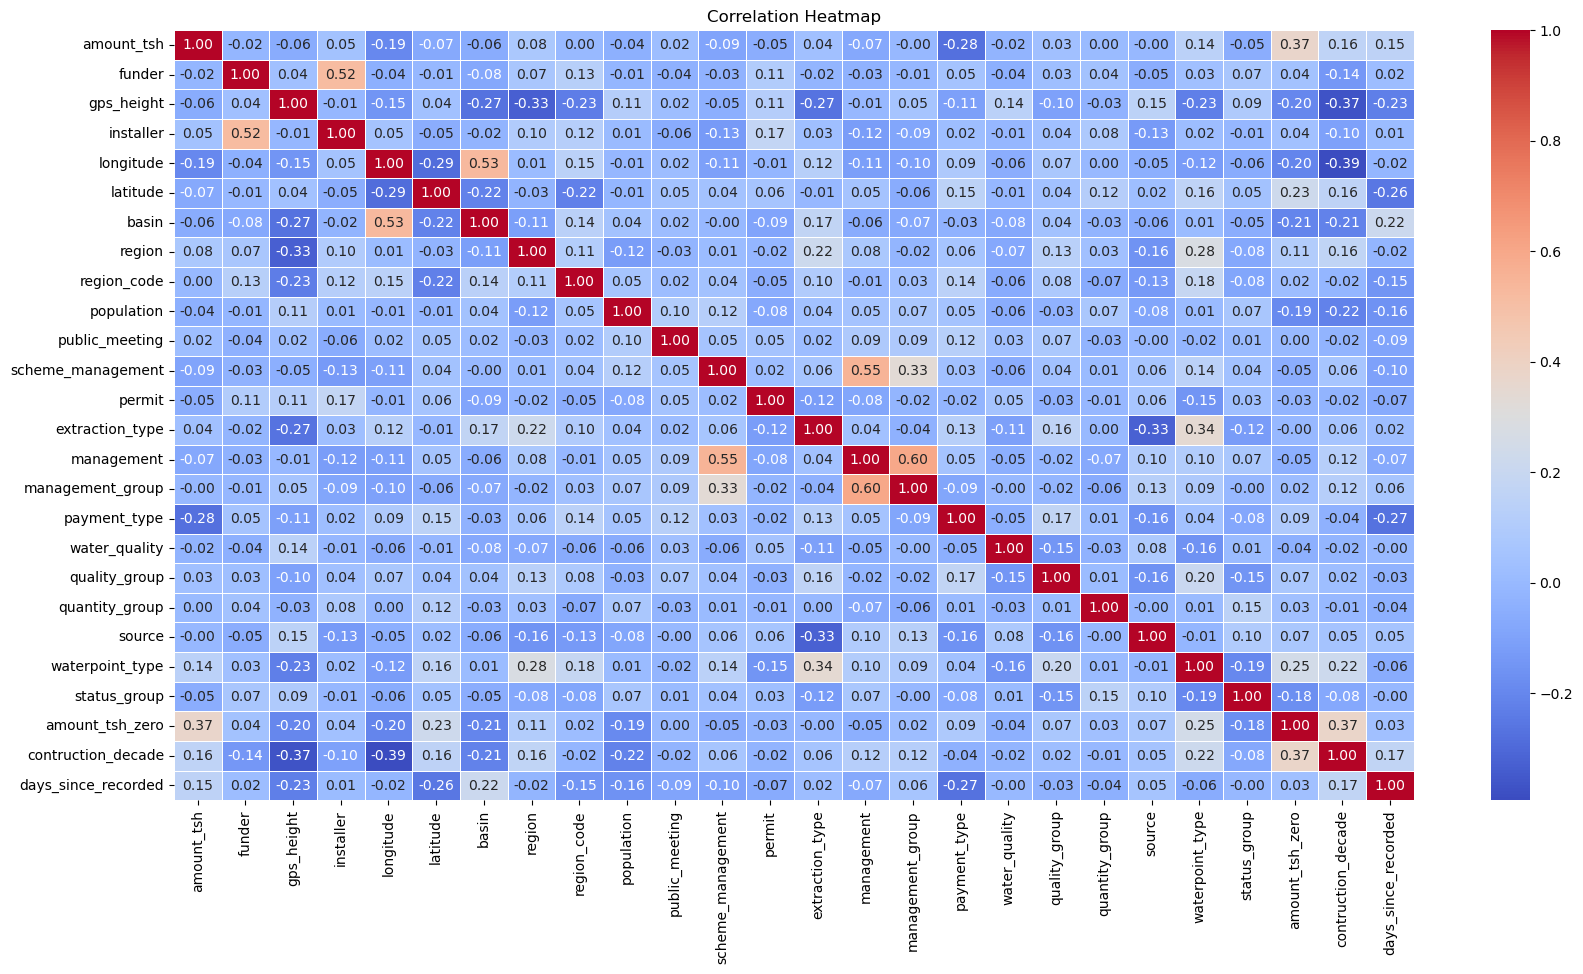

In [72]:
# Calculating the correlation matrix to check if any features are highly correlated
correlation_matrix = train_df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### Feature selection using Recursive feature selection method.

In [62]:
# Splitting train_df from training model
X = train_df.drop(columns=['status_group'])  # Features
y = train_df['status_group']  # Target variable


In [63]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random forest classifier
clf = RandomForestClassifier()

# Recursive feature selection  
rfe = RFE(estimator=clf, n_features_to_select=15, step=1,verbose=2)

# Fitting RFE to the training data
rfe.fit(X_train, y_train)

# Getting the selected features
selected_features = X_train.columns[rfe.support_]

# Printing the selected features
print("Selected features:", selected_features.tolist())

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Selected features: ['funder', 'gps_height', 'installer', 'longitude', 'latitude', 'region', 'population', 'extraction_type', 'management', 'payment_type', 'quantity_group', 'source', 'waterpoint_type', 'contruction_decade', 'days_since_recorded']


In [75]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 59400 entries, 0 to 59399
Series name: status_group
Non-Null Count  Dtype  
--------------  -----  
59400 non-null  float64
dtypes: float64(1)
memory usage: 928.1 KB


In [64]:
# Splitting the dataset with respect to the selected features using RFE
X = train_df[['funder', 'gps_height', 'installer', 'longitude', 'latitude', 'region', 'population', 'extraction_type', 'management',
              'payment_type', 'quantity_group', 'source', 'waterpoint_type', 'contruction_decade', 'days_since_recorded']]
y = train_df['status_group']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Random Forest Model

In [65]:
# Random Forest Model
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest classifier
rf_classifier = RandomForestClassifier()

# Defining the hyperparameters grid
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# StratifiedKFold 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                              cv=cv, verbose=2, n_jobs=-1)

# Performming hyperparameter tuning
rf_grid_search.fit(X_train_scaled, y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300]},
             verbose=2)

In [66]:
# Printing the best parameters found in gridsearch
print("Best parameters:", rf_grid_search.best_params_)
# Evaluating the model with the best parameters
best_rf_model = rf_grid_search.best_estimator_
y_predRF = rf_grid_search.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_predRF))
print("Classification Report:\n", classification_report(y_test, y_predRF))

Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.8169191919191919
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.78      0.82      4572
         1.0       0.81      0.91      0.86      6457
         2.0       0.61      0.31      0.42       851

    accuracy                           0.82     11880
   macro avg       0.76      0.67      0.70     11880
weighted avg       0.81      0.82      0.81     11880



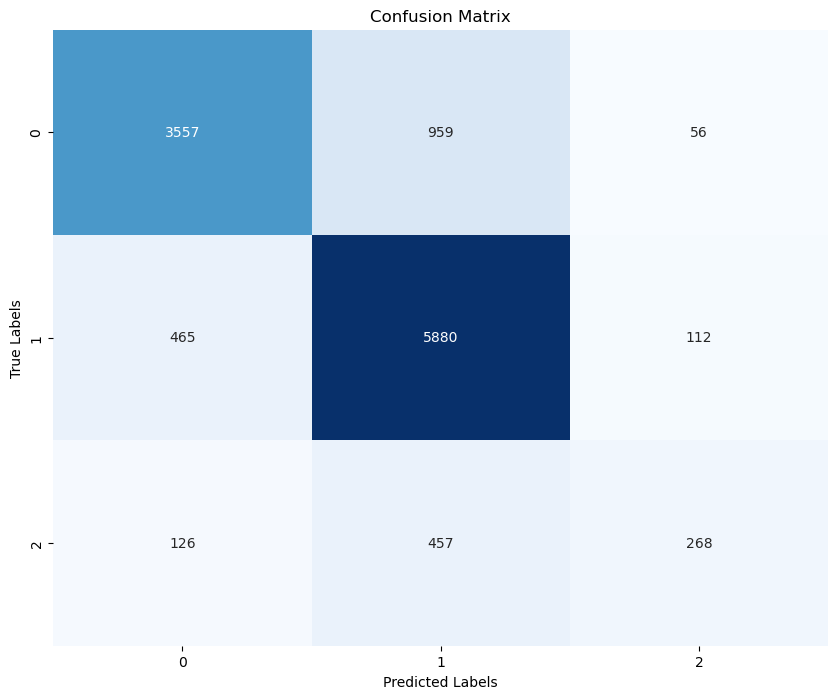

In [67]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_predRF)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [69]:
# Computing balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_predRF)

# Printing the balanced accuracy
print("Balanced Accuracy:", balanced_acc)

Balanced Accuracy: 0.6678532452098657


In [60]:
#

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
  Using cached lightgbm-4.3.0-py3-none-win_amd64.whl.metadata (19 kB)
Using cached lightgbm-4.3.0-py3-none-win_amd64.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


#### LightGBM Model

In [67]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Defining the hyperparameter grid
param_grid = {
    'learning_rate': [0.1,0.2],  
    'n_estimators': [200,300],     
    'num_leaves': [16, 32],        
    'min_data_in_leaf': [10, 20],   
    'boosting_type': ['gbdt'],             
}

# LightGBM classifier
lgb_classifier = LGBMClassifier(class_weight= 'balanced')

# StratifiedKFold 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV
random_search_lgb = RandomizedSearchCV(estimator=lgb_classifier, param_distributions=param_grid,
                                       n_iter=100, cv=cv, scoring='accuracy', random_state=42,
                                       n_jobs=-1, verbose=2)

# Perform hyperparameter tuning
random_search_lgb.fit(X_train, y_train)



C:\Anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1351
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 15
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=LGBMClassifier(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'learning_rate': [0.1, 0.2],
                                        'min_data_in_leaf': [10, 20],
                                        'n_estimators': [200, 300],
                                        'num_leaves': [16, 32]},
                   random_state=42, scoring='accuracy', verbose=2)

In [68]:
# best parameters
best_params_lgb = random_search_lgb.best_params_
print("Best Parameters:", best_params_lgb)

# best model
best_model_lgb = random_search_lgb.best_estimator_

# Evaluating the best model on the test set
y_pred_lgb = best_model_lgb.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print("Test Accuracy:", accuracy_lgb)

# Printing classification report
print("Classification Report:\n", classification_report(y_test, y_pred_lgb))

Best Parameters: {'num_leaves': 32, 'n_estimators': 300, 'min_data_in_leaf': 10, 'learning_rate': 0.2, 'boosting_type': 'gbdt'}
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
Test Accuracy: 0.7604377104377105
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.77      0.80      4572
         1.0       0.84      0.77      0.80      6457
         2.0       0.31      0.63      0.42       851

    accuracy                           0.76     11880
   macro avg       0.66      0.72      0.67     11880
weighted avg       0.80      0.76      0.77     11880



#### XGBoost Model

In [94]:
# XGBoost model

# Defining parameters for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3],
    'subsample': [0.6,1.0],
    'colsample_bytree': [0.6, 0.8],
    'n_estimators': [200,300]
}

# XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# GridSearchCV
grid_searchXG = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)

# Performming hyperparameter tuning
grid_searchXG.fit(X_train, y_train)



Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3],
                         'n_estimators': [200, 300], 'subsample': [0.6, 1.0]},
             scoring='accuracy', verbose=2)

In [95]:
# Getting the best parameters
best_params = grid_searchXG.best_params_
print("Best Parameters:", best_params)

# XGBoost classifier with best parameters
best_xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, **best_params)

# Fitting the classifier to the training data
best_xgb_classifier.fit(X_train, y_train)

Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [96]:
# Predicting on the test data
y_predXG = best_xgb_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_predXG)
print("Test Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_predXG))



Test Accuracy: 0.8084175084175084
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.77      0.81      4572
         1.0       0.80      0.90      0.85      6457
         2.0       0.61      0.32      0.42       851

    accuracy                           0.81     11880
   macro avg       0.75      0.66      0.69     11880
weighted avg       0.80      0.81      0.80     11880



In [97]:
# Computing balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_predXG)

print("Balanced Accuracy:", balanced_acc)

Balanced Accuracy: 0.6629996792390712


Visualizating the performance of the Tree models

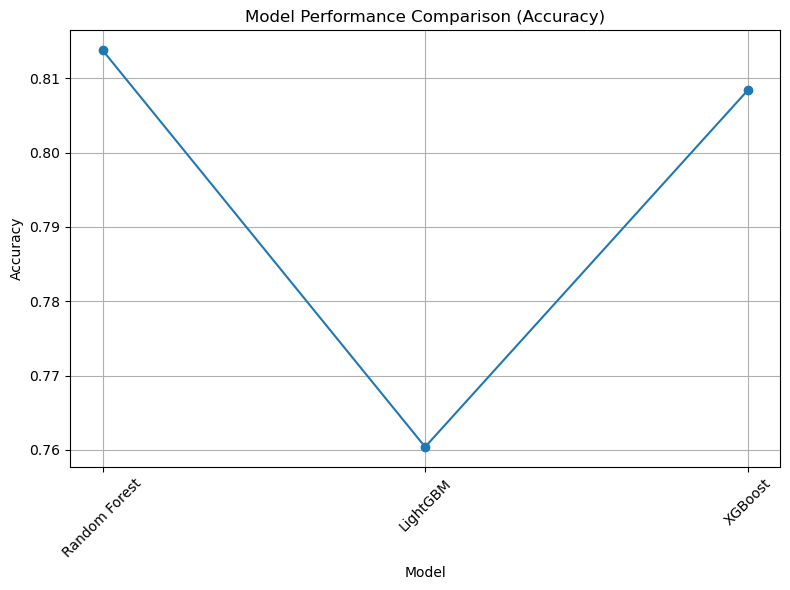

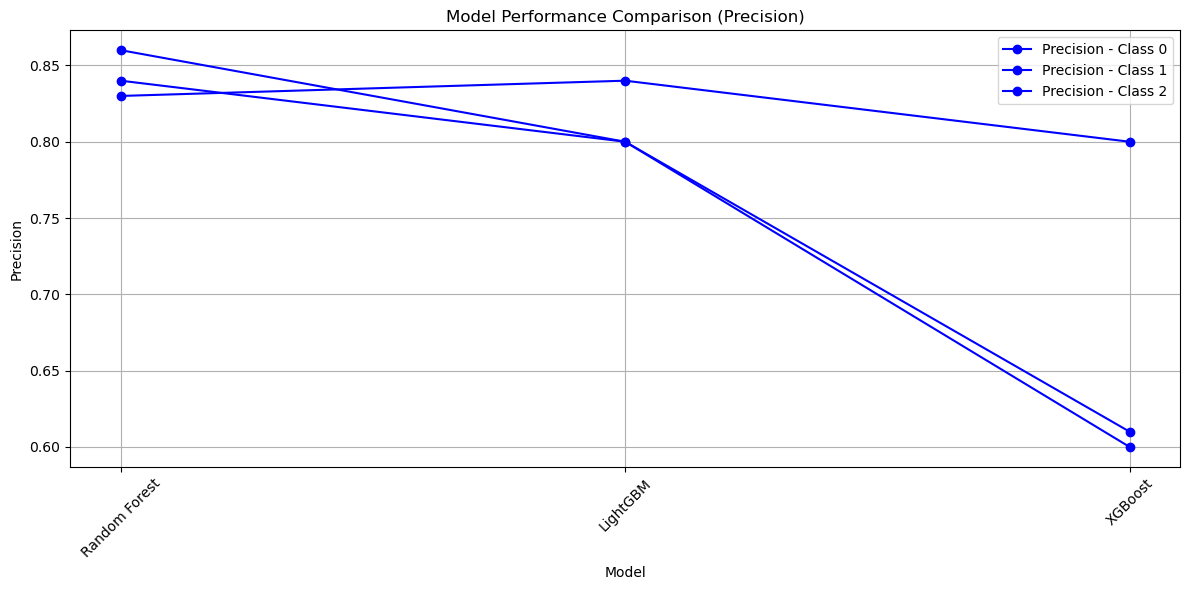

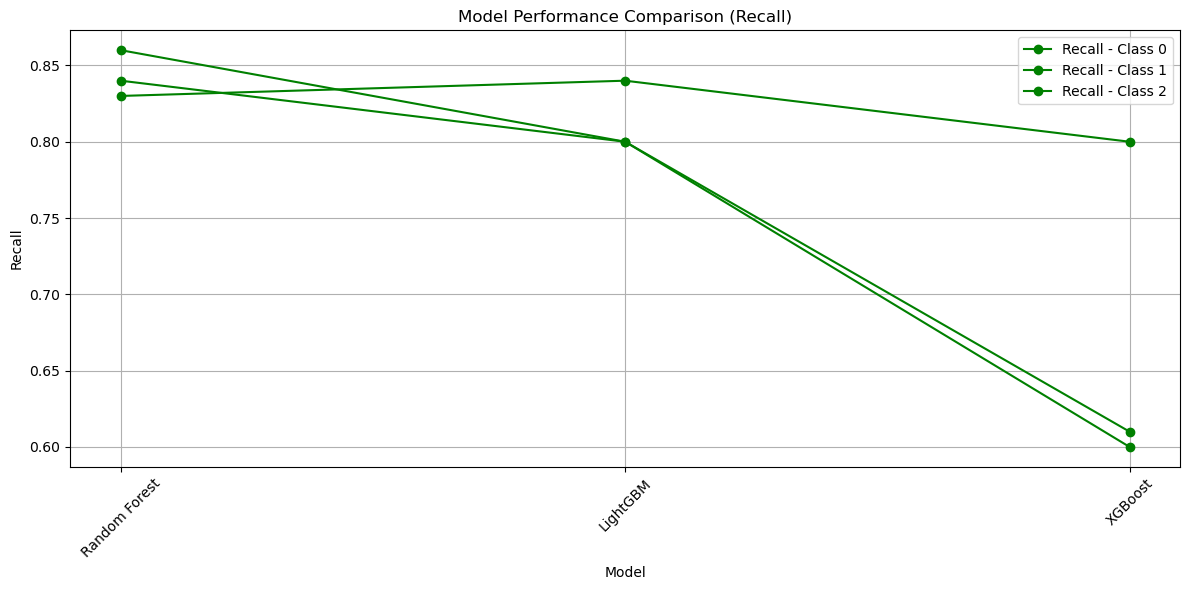

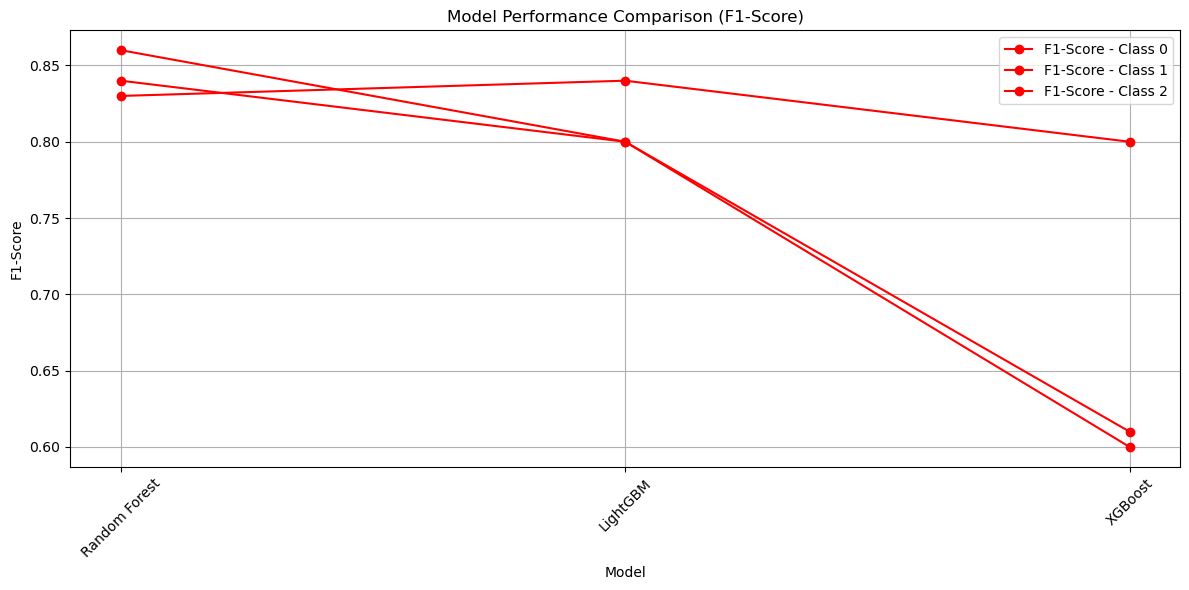

In [100]:


# Extracting metrics from your reports (
models = ["Random Forest", "LightGBM", "XGBoost"]
accuracy = [0.8138, 0.7604, 0.8084]  
precision = [[0.86, 0.80, 0.60],  
              [0.83, 0.84, 0.80],
              [0.84, 0.80, 0.61]]
recall = [[0.77, 0.91, 0.31],  
         [0.77, 0.77, 0.63],
         [0.77, 0.90, 0.32]]
f1_score = [[0.81, 0.85, 0.41],  
            [0.80, 0.80, 0.42],
            [0.81, 0.85, 0.42]]

# Plotting accuracy
plt.figure(figsize=(8, 6))
plt.plot(models, accuracy, marker='o', linestyle='-', label='Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison (Accuracy)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting class-wise precision, recall, and F1-score
metrics = ['Precision', 'Recall', 'F1-Score']
colors = ['b', 'g', 'r'] 
classes = ['Class 0', 'Class 1', 'Class 2']  
n_classes = len(classes)

for i, metric in enumerate(metrics):
  plt.figure(figsize=(12, 6))
  for j in range(n_classes):
    plt.plot(models, precision[j], marker='o', linestyle='-', color=colors[i], label=f'{metric} - {classes[j]}')
  plt.xlabel('Model')
  plt.ylabel(metric)
  plt.title(f'Model Performance Comparison ({metric})')
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.legend()
  plt.tight_layout()
  plt.show()


### Since Random Forest outperforms other models, we will explore OverSampling techniques to potentially improve its performance further.

#### Random Forest Model using SMOTE

In [49]:
# Loading data 
X1 = train_df[['funder', 'gps_height', 'installer', 'longitude', 'latitude', 'region', 'population', 'extraction_type', 'management',
              'payment_type', 'quantity_group', 'source', 'waterpoint_type', 'contruction_decade', 'days_since_recorded']]
y1 = train_df['status_group']

# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [52]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



# Calculating the total count of each class
total_count = y_train.value_counts()

# adjusting the ratio to give more weight to class 2
sampling_strategy = {
    0: total_count.max(),  # Keep the majority class the same
    1: total_count.max(),  # Keep the majority class the same
    2: total_count.max() * 4  # Increasing the minority class 
}

# Applying SMOTE oversampling with the modified sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Creating the Random Forest classifier with best specified parameters
rf_classifier1 = RandomForestClassifier(n_estimators=300,
                                       min_samples_split=2,
                                       min_samples_leaf=2,
                                       max_depth=30,
                                       bootstrap=False,
                                       random_state=42,verbose=1)  


rf_classifier1.fit(X_train_resampled, y_train_resampled)  

# predictions on the test set
y_predRF1 = rf_classifier1.predict(X_test)

accuracy = accuracy_score(y_test, y_predRF1)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_predRF1))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test Accuracy: 0.7925925925925926
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      4572
         1.0       0.83      0.84      0.83      6457
         2.0       0.40      0.51      0.45       851

    accuracy                           0.79     11880
   macro avg       0.69      0.71      0.70     11880
weighted avg       0.80      0.79      0.80     11880



[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished


In [53]:
# Calculating balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_predRF1)
print("Balanced Accuracy:", balanced_accuracy)

Balanced Accuracy: 0.7087063946673938


#### Random Forest Model using RandomOverSampler

In [55]:


# Applying oversampling
random = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = random.fit_resample(X_train, y_train)
class_weights = {
    0: 2.5, 
    1: 2.5,
    2: 5.0
}

# Creating the Random Forest classifier with best specified parameters
rf_classifier2 = RandomForestClassifier(n_estimators=300,
                                       min_samples_split=2,
                                       min_samples_leaf=2,
                                       max_depth=30,
                                       bootstrap=False,
                                       random_state=42,verbose=1,class_weight=class_weights)  


rf_classifier2.fit(X_train_resampled, y_train_resampled)  

# predictions on the test set
y_predRF2 = rf_classifier2.predict(X_test)

accuracy = accuracy_score(y_test, y_predRF2)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_predRF2))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   46.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test Accuracy: 0.7951178451178451
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.79      0.81      4572
         1.0       0.82      0.85      0.83      6457
         2.0       0.40      0.46      0.43       851

    accuracy                           0.80     11880
   macro avg       0.69      0.70      0.69     11880
weighted avg       0.80      0.80      0.80     11880



[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished


In [56]:
# Calculating balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_predRF2)
print("Balanced Accuracy:", balanced_accuracy)

Balanced Accuracy: 0.697099166018937


#### Random Forest Model using ADASYN

In [60]:
from imblearn.over_sampling import ADASYN

# Applying ADASYN oversampling
adasyn = ADASYN(sampling_strategy='auto',random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Creating the Random Forest classifier with best specified parameters
rf_classifier3 = RandomForestClassifier(n_estimators=300,
                                       min_samples_split=2,
                                       min_samples_leaf=2,
                                       max_depth=30,
                                       bootstrap=False,
                                       random_state=42,verbose=1,class_weight=class_weights)  


rf_classifier3.fit(X_train_resampled, y_train_resampled)  

# predictions on the test set
y_predRF3 = rf_classifier3.predict(X_test)

accuracy = accuracy_score(y_test, y_predRF3)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_predRF3))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test Accuracy: 0.7917508417508418
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.79      0.81      4572
         1.0       0.83      0.84      0.83      6457
         2.0       0.40      0.49      0.44       851

    accuracy                           0.79     11880
   macro avg       0.69      0.70      0.69     11880
weighted avg       0.80      0.79      0.79     11880



[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished


In [61]:
# Calculating balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_xgb3)
print("Balanced Accuracy:", balanced_accuracy)

Balanced Accuracy: 0.6884568910222303


### SMOTE oversampling yielded the best results, achieving a balanced accuracy of 70%.

In [ ]:
X2 = test_df[['funder', 'gps_height', 'installer', 'longitude', 'latitude', 'region', 'population', 'extraction_type', 'management',
              'payment_type', 'quantity_group', 'source', 'waterpoint_type', 'contruction_decade', 'days_since_recorded']]

# Make predictions on the test set
y_predRF2 = rf_classifier1.predict(X2)

In [ ]:
# Create a new column in `test_df` to store the predictions
test_df['prediction'] = y_predRF2

# Save the modified `test_df` to a CSV file (or another file format)
test_df.to_csv('testdf_with_predictions.csv', index=False)